In [6]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from sns_toolbox.neurons import SpikingNeuron
from sns_toolbox.connections import SpikingSynapse
from sns_toolbox.networks import Network
from sns_toolbox.renderer import render

import numpy as np
import matplotlib.pyplot as plt



In [7]:
t = np.arange(0, 500, 1)
spikes = np.zeros([1, len(t)])
spikes[0, 5] = 1

trace1 = np.zeros([1, len(t)])
trace = trace1[0]

A = 1

for i in range(len(spikes[0])):
    if spikes[0, i] == 1:
        print('Spike!')
        trace[i] = 1
    if trace[i-1] != 0:
        trace[i] = trace[i-1] * (1-0.01)



A_pos = 0.010
tou_pos = 0.5

A_neg = 0.012
tou_neg = 2.5


Spike!


In [8]:

tp = np.arange(-60, 60, 0.01)

W_p = A_pos * np.exp(tp[0:6000] / tou_pos)
W_d = -A_neg * np.exp(-tp[6000:-1] / tou_neg)

def weightUpdate(dt, A_pos, A_neg, tou_pos, tou_neg):
    # A_pos = 0.1 # Max potentiation level
    # A_neg = 0.25 # Max Depression value
    # tou_pos = 10.0 # ms. Decay time constant for potentiation
    # tou_neg = 11.0 # ms. Decay time constant for depression
    # If dt is positive, that means that the postsynaptic neuron spiked before the presynaptic. DEPRESSION
    if dt > 0:
        weight_change = -A_neg * np.exp(-dt / tou_neg)
    # If dt is negative, that means the presynaptic neuron spiked before the postsynaptic. POTENTIATION
    if dt <= 0:
        weight_change = A_pos * np.exp(dt / tou_pos)
    return weight_change

points = []
tm = [-24.6, -20, -10, -5, 0, 5, 12.5, 16, 24.6]
# tm = [-0.5999, 15.5999]
for i in tm:
    points.append(weightUpdate(i, A_pos, A_neg, tou_pos, tou_neg))
print(points)


vt = [0, 0]
vp = [0.15, -0.30]
# So i could add a variable that would save the current time stamp every time a presynaptic spike fires. 
# Then, when a postsynaptic spike fires, it would look at the timestamps of all the presynaptic neurons and update their connection weights based on spike timing.
# This also means that if a presynaptic spike fires, it would need to check the timestamps of all the postsynaptic neurons. If a post synaptic neuron has recently fired, then it would undergo potentiation. 

[np.float64(4.292511727467311e-24), np.float64(4.248354255291589e-20), np.float64(2.061153622438558e-11), np.float64(4.5399929762484854e-07), np.float64(0.01), np.float64(-0.0016240233988393524), np.float64(-8.08553639890256e-05), np.float64(-1.993868727808721e-05), np.float64(-6.393277334224874e-07)]


In [9]:
for point in points:
    print(point)

4.292511727467311e-24
4.248354255291589e-20
2.061153622438558e-11
4.5399929762484854e-07
0.01
-0.0016240233988393524
-8.08553639890256e-05
-1.993868727808721e-05
-6.393277334224874e-07


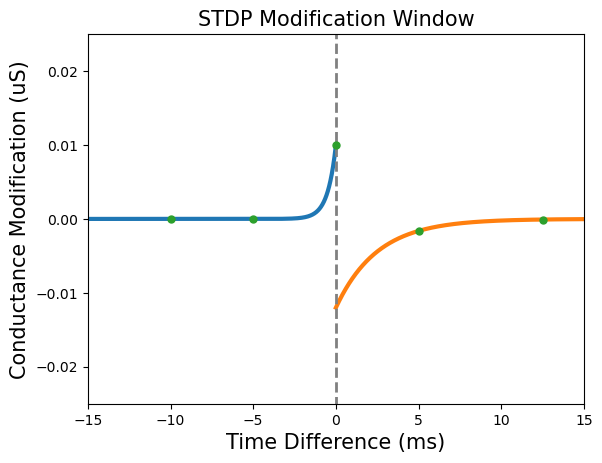

In [10]:
plt.figure()
# plt.plot(t, spikes[0])
plt.plot(tp[0:6000], W_p, linewidth='3')
plt.plot(tp[6000:-1], W_d, linewidth='3')

plt.plot(vt, vp, '--', color='gray', linewidth='2')

plt.ylim([-0.025, 0.025])
plt.xlim([-15, 15])

plt.plot(tm, points, 'o', ms='5')
plt.ylabel('Conductance Modification (uS)', size='15')
plt.xlabel('Time Difference (ms)', size='15')
plt.title('STDP Modification Window', size='15')

plt.savefig('STDPWindow.png', dpi=600)
plt.show()